In [159]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [161]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#machine larning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans


import xgboost as xgb

import lightgbm as lgb

#for time series
import statsmodels.api as sm

In [328]:
df= pd.read_csv('Ecommerce_Sales_Prediction_Dataset.csv')

In [330]:
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [332]:
df.tail()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26
999,26-09-2025,Home Decor,93.94,29.68,Regular,4258.11,39


In [334]:
df.shape

(1000, 7)

In [336]:
df.isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

In [338]:
df.dtypes

Date                 object
Product_Category     object
Price               float64
Discount            float64
Customer_Segment     object
Marketing_Spend     float64
Units_Sold            int64
dtype: object

In [340]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1000.0,505.24192,289.791248,14.59,243.3425,509.310,747.5925,999.42
Discount,1000.0,24.91975,14.439951,0.01,12.9950,24.965,37.5625,49.92
Marketing_Spend,1000.0,4912.83024,2840.602656,100.30,2413.0200,4837.245,7319.6750,9995.62
Units_Sold,1000.0,29.63100,7.267989,5.00,24.0000,30.000,34.0000,57.00


EDA ANALYSIS

In [343]:
#Unit Solds by category

df_category= df.groupby('Product_Category')['Units_Sold'].sum().reset_index()
df_category=df_category.sort_values(by='Units_Sold', ascending=False)
print(df_category)

  Product_Category  Units_Sold
0      Electronics        6210
3           Sports        6125
4             Toys        6003
1          Fashion        5650
2       Home Decor        5643


/var/folders/sx/vw05z9155wg8x4j6yhhgxynm0000gn/T/ipykernel_2120/3346026124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Units_Sold', data=df_category, palette='pastel')


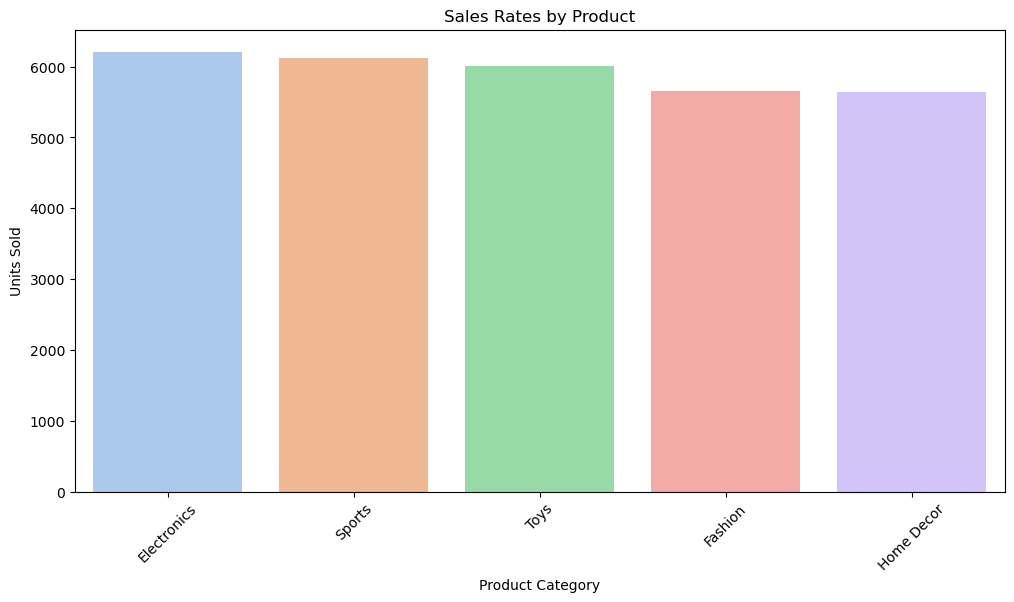

In [345]:
#visualization

plt.figure(figsize=(12,6))
sns.barplot(x='Product_Category', y='Units_Sold', data=df_category, palette='pastel')
plt.title('Sales Rates by Product')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

Revenue per Customer

In [348]:

df['total_sales']=df['Price']*df['Units_Sold']
df_sales = df.groupby('Product_Category')['total_sales'].sum().reset_index()

In [350]:
df_customer=df.groupby('Product_Category')['Customer_Segment'].nunique().reset_index()
df_customer.columns=['Product_Category', 'total_customers']

In [352]:
df2=pd.merge(df_sales, df_customer, on='Product_Category')

In [354]:
#Calculating Revenue Per Customer
df2['customer_revenue']=df2['total_sales']/df2['total_customers']

In [356]:
print(df2)

  Product_Category  total_sales  total_customers  customer_revenue
0      Electronics   3022450.44                3      1.007483e+06
1          Fashion   2968174.28                3      9.893914e+05
2       Home Decor   2779860.07                3      9.266200e+05
3           Sports   3201408.12                3      1.067136e+06
4             Toys   3030591.65                3      1.010197e+06


Visualization of Revenue Per Customer

/var/folders/sx/vw05z9155wg8x4j6yhhgxynm0000gn/T/ipykernel_2120/1159399858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='customer_revenue', data=df2, palette='pastel')


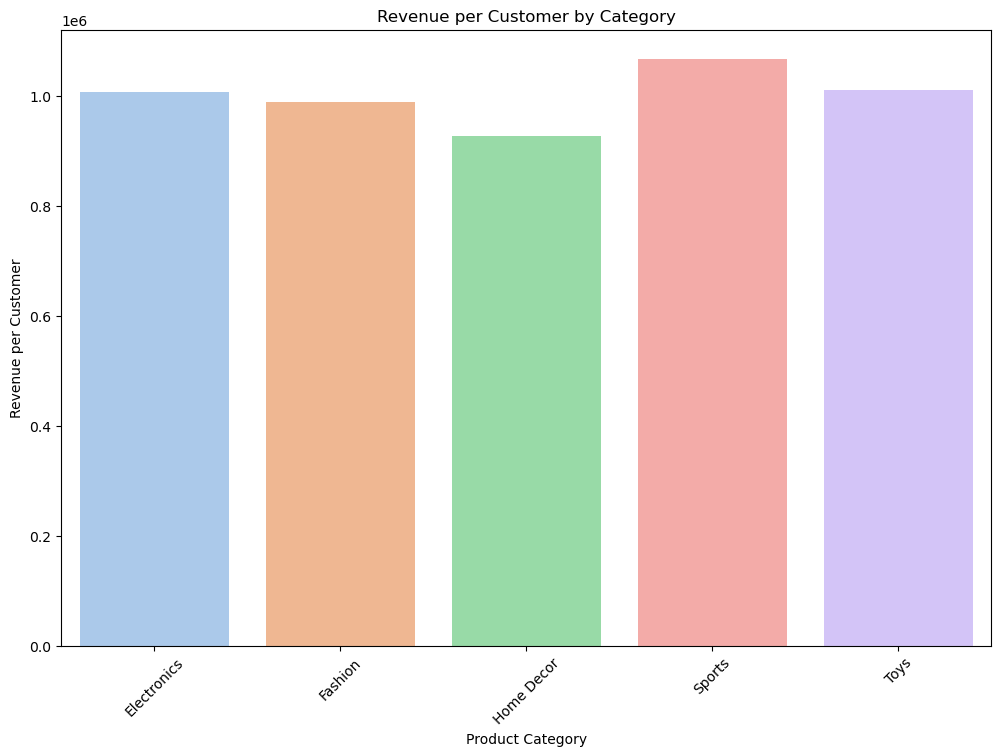

In [359]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product_Category', y='customer_revenue', data=df2, palette='pastel')
plt.title('Revenue per Customer by Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue per Customer')
plt.xticks(rotation=45)
plt.show()


KPI's ANALYSİS

AOV ANAYSIS

In [363]:
df['Price'] = df['Price'].replace(r'[^0-9.]+', '', regex=True) 
df['Discount'] = df['Discount'].replace(r'[^0-9.]+', '', regex=True) 


In [365]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

In [367]:
print(df['Price'].isnull().sum())
print(df['Discount'].isnull().sum())


0
0


In [369]:
#Calculating total revenue 

df['Revenue'] = (df['Price'] - df['Discount']) * df['Units_Sold']


#calculating total sales and revenue

total_revenue= df['Revenue'].sum()
total_sales=df['Units_Sold'].sum()

#Calculating AOV

AOV= total_revenue/ total_sales

#Results

print(f"Average Order Values(AOV): {AOV:.2f} Dolar")

Average Order Values(AOV): 481.51 Dolar


Text(0, 0.5, 'Dolar')

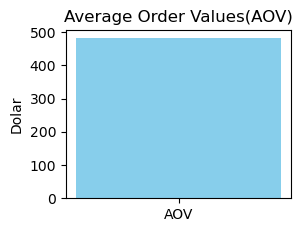

In [371]:
plt.subplot(2, 2, 1)
plt.bar(['AOV'], [AOV], color='skyblue')
plt.title('Average Order Values(AOV)')
plt.ylabel('Dolar')

CUSTOMER SEGMENTATION ANALYSIS

In [374]:
df['Revenue'] = (df['Price'] - df['Discount']) * df['Units_Sold']

segment_analysis=df.groupby('Customer_Segment').agg(
    total_revenue=('Revenue', 'sum'),
    total_sales=('Units_Sold', 'sum')
).reset_index()

print(segment_analysis)

  Customer_Segment  total_revenue  total_sales
0       Occasional     5011172.67         9842
1          Premium     4420968.51         9567
2          Regular     4835353.07        10222


/var/folders/sx/vw05z9155wg8x4j6yhhgxynm0000gn/T/ipykernel_2120/791349221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_analysis, x='Customer_Segment', y='total_revenue', palette='viridis')


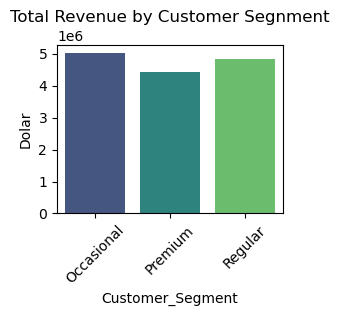

In [376]:
plt.subplot(2, 2, 2)
sns.barplot(data=segment_analysis, x='Customer_Segment', y='total_revenue', palette='viridis')
plt.title('Total Revenue by Customer Segnment')
plt.ylabel('Dolar')
plt.xticks(rotation=45)
plt.show()


ROI (Return on Investment)

In [379]:
df['Revenue'] = (df['Price'] - df['Discount']) * df['Units_Sold']

# Total Revenue
total_revenue = df['Revenue'].sum()
total_marketing_revenue = df['Marketing_Spend'].sum()

marketing_roi = ((total_revenue - total_marketing_revenue) / total_marketing_revenue) * 100

print(f"Total Revenue: {total_revenue:.2f} Dolar")
print(f"Toplam Marketing Revenue: {total_marketing_revenue:.2f} TL")
print(f"Marketing ROI: {marketing_roi:.2f}%")

Total Revenue: 14267494.25 Dolar
Toplam Marketing Revenue: 4912830.24 TL
Marketing ROI: 190.41%


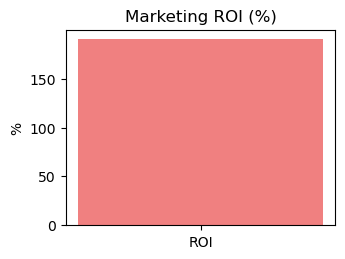

In [381]:
plt.subplot(2, 2, 4)
plt.bar(['ROI'], [marketing_roi], color='lightcoral')
plt.title('Marketing ROI (%)')
plt.ylabel('%')

plt.tight_layout()
plt.show()


Category Analysis

In [384]:
df['Revenue'] = (df['Price'] - df['Discount']) * df['Units_Sold']

# Total Revenue by Category
category_analysis = df.groupby('Product_Category').agg(
    Total_revenue=('Revenue', 'sum'),
    Total_sales=('Units_Sold', 'sum')
).reset_index()

# Results
print(category_analysis)

  Product_Category  Total_revenue  Total_sales
0      Electronics     2866100.57         6210
1          Fashion     2818970.56         5650
2       Home Decor     2657428.98         5643
3           Sports     3053069.60         6125
4             Toys     2871924.54         6003


/var/folders/sx/vw05z9155wg8x4j6yhhgxynm0000gn/T/ipykernel_2120/836972067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_analysis, x='Product_Category', y='Total_revenue', palette='plasma')


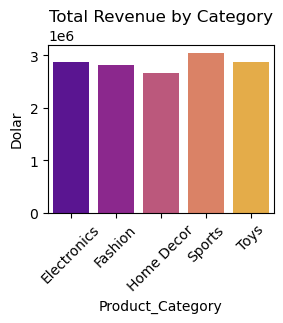

In [386]:
plt.subplot(2, 2, 3)
sns.barplot(data=category_analysis, x='Product_Category', y='Total_revenue', palette='plasma')
plt.title('Total Revenue by Category')
plt.ylabel('Dolar')
plt.xticks(rotation=45)
plt.show()

CUSTOMER SEGMENTATION 

In [389]:
df["Total_Spend"] = df["Price"] * df["Units_Sold"]
customer_data = df.groupby("Customer_Segment").agg({"Total_Spend": "sum", "Units_Sold": "sum"}).reset_index()

#Training the k-means model
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Segment"] = kmeans.fit_predict(customer_data[["Total_Spend", "Units_Sold"]])




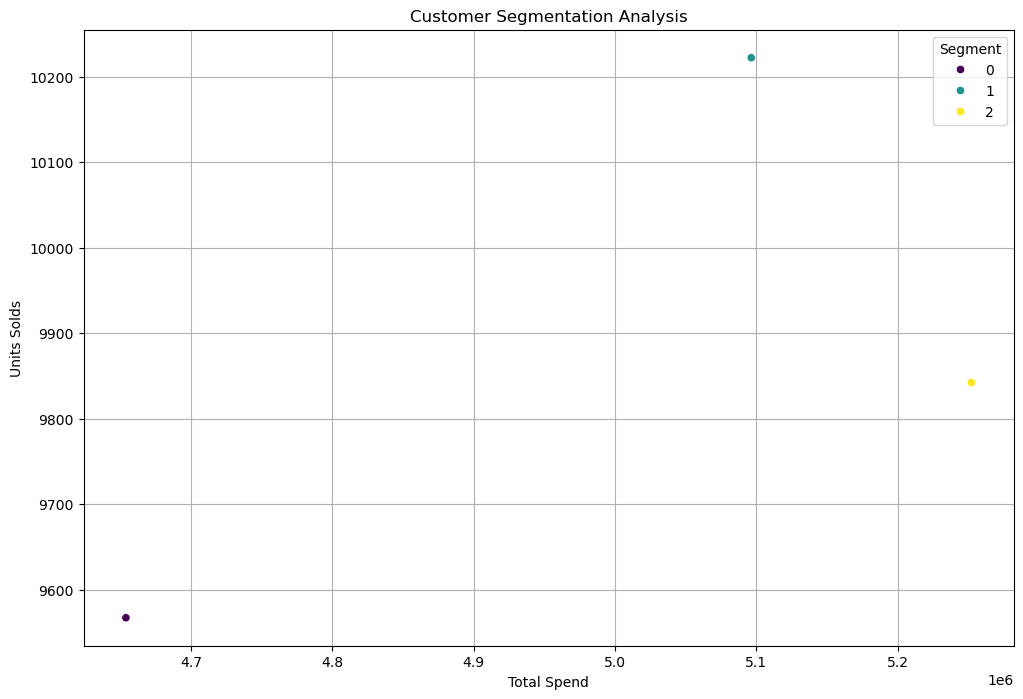

In [391]:
#Customer Segmentation Visiuzalization

plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_data, x="Total_Spend", y="Units_Sold", hue="Segment", palette="viridis")
plt.title("Customer Segmentation Analysis")
plt.xlabel("Total Spend")
plt.ylabel("Units Solds")
plt.legend(title='Segment')
plt.grid()
plt.show()

PREDICTIVE MODELS

In [394]:
print(df['Date'].unique())

['01-01-2023' '02-01-2023' '03-01-2023' '04-01-2023' '05-01-2023'
 '06-01-2023' '07-01-2023' '08-01-2023' '09-01-2023' '10-01-2023'
 '11-01-2023' '12-01-2023' '13-01-2023' '14-01-2023' '15-01-2023'
 '16-01-2023' '17-01-2023' '18-01-2023' '19-01-2023' '20-01-2023'
 '21-01-2023' '22-01-2023' '23-01-2023' '24-01-2023' '25-01-2023'
 '26-01-2023' '27-01-2023' '28-01-2023' '29-01-2023' '30-01-2023'
 '31-01-2023' '01-02-2023' '02-02-2023' '03-02-2023' '04-02-2023'
 '05-02-2023' '06-02-2023' '07-02-2023' '08-02-2023' '09-02-2023'
 '10-02-2023' '11-02-2023' '12-02-2023' '13-02-2023' '14-02-2023'
 '15-02-2023' '16-02-2023' '17-02-2023' '18-02-2023' '19-02-2023'
 '20-02-2023' '21-02-2023' '22-02-2023' '23-02-2023' '24-02-2023'
 '25-02-2023' '26-02-2023' '27-02-2023' '28-02-2023' '01-03-2023'
 '02-03-2023' '03-03-2023' '04-03-2023' '05-03-2023' '06-03-2023'
 '07-03-2023' '08-03-2023' '09-03-2023' '10-03-2023' '11-03-2023'
 '12-03-2023' '13-03-2023' '14-03-2023' '15-03-2023' '16-03-2023'
 '17-03-20

In [402]:
# format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')


print(df[df['Date'].isna()])


Empty DataFrame
Columns: [Date, Product_Category, Price, Discount, Customer_Segment, Marketing_Spend, Units_Sold, total_sales, Revenue, Total_Spend]
Index: []


In [404]:
df['Date'] = pd.to_datetime(df['Date'])
df = pd.get_dummies(df, columns=['Product_Category', 'Customer_Segment'], drop_first=True)
X = df.drop(columns=['Date', 'Units_Sold'])
y = df['Units_Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [406]:
mse = mean_squared_error(y_test, y_pred)
print(f'Ortalama Squared Error: {mse}')

Ortalama Squared Error: 8.065040893130968


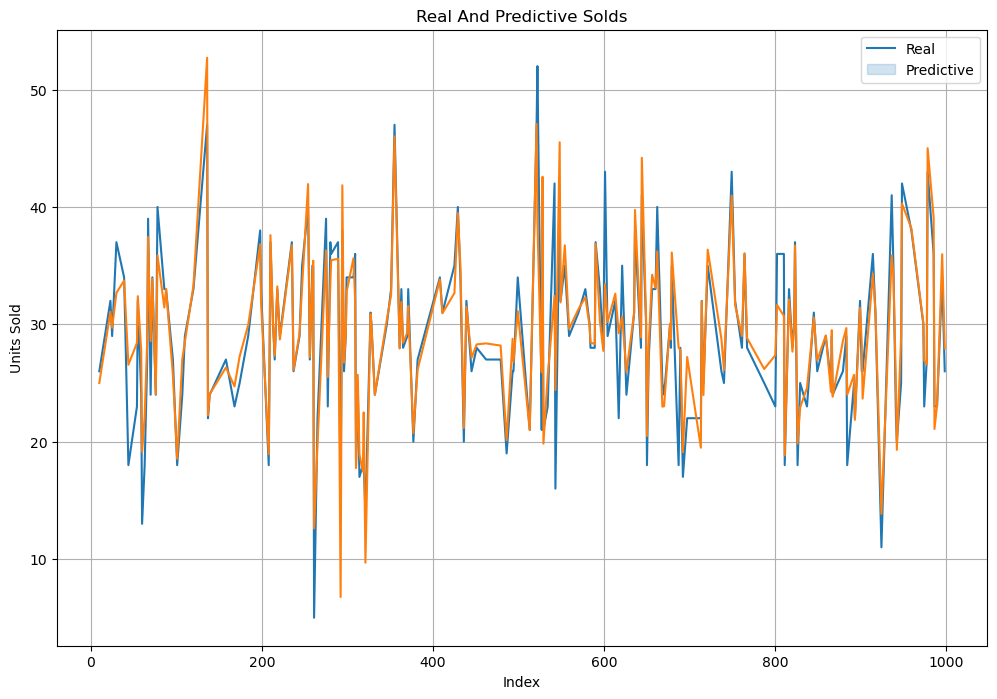

In [412]:
#merge real and predictive
results = pd.DataFrame({'Real': y_test, 'Predictive': y_pred})

#visualization
plt.figure(figsize=(12, 8))
sns.lineplot(data=results, dashes=False)
plt.title('Real And Predictive Solds')
plt.xlabel('Index')
plt.ylabel('Units Sold')
plt.legend(['Real', 'Predictive'])
plt.grid()
plt.show()